In [154]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt


def fourier1d(signal: np.ndarray) -> np.ndarray:
    max_freq = len(signal)
    fourier = np.empty(max_freq, dtype=complex)
    for f in range(max_freq):
        fourier_freq = 0
        for i, s in enumerate(signal):
            x = i / len(signal)
            fourier_freq += s * np.exp(-2j*np.pi*f*x)
        fourier[f] = fourier_freq
    return fourier

def inverse_fourier1d(fourier: np.ndarray) -> np.ndarray:
    signal_len = len(fourier)
    signal = np.empty(signal_len, dtype=complex)
    for i in range(signal_len):
        signal_i = 0
        for f, fourier_f in enumerate(fourier):
            x = f / len(fourier) # integrating over f instead of i
            signal_i += fourier_f * np.exp(2j*np.pi*i*x) # note the sign
        signal[i] = signal_i / len(fourier)
    return np.real(signal)

test_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fourier = fourier1d(test_signal)
inverse_fourier = inverse_fourier1d(fourier)
assert np.allclose(test_signal, inverse_fourier)
assert np.allclose(np.fft.fft(test_signal), fourier)
assert np.allclose(np.fft.ifft(fourier), inverse_fourier)

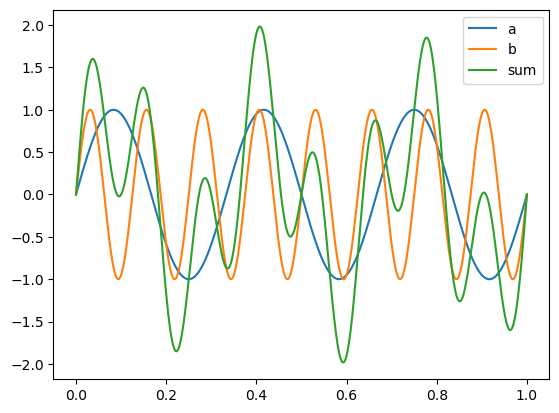

In [112]:
def generate_wave(f: int, signal_len_s: int = 1, sample_rate: int = 1000) -> List[np.ndarray]:
    x = np.linspace(0, signal_len_s, sample_rate*signal_len_s)
    y = np.sin(np.linspace(0, 2*np.pi*f*signal_len_s, sample_rate*signal_len_s))
    return x, y

x, signal_a = generate_wave(3)
_, signal_b = generate_wave(8)
signal_sum = signal_a + signal_b
plt.plot(x, signal_a)
plt.plot(x, signal_b)
plt.plot(x, signal_sum)
plt.legend(['a', 'b', 'sum'])
plt.show()

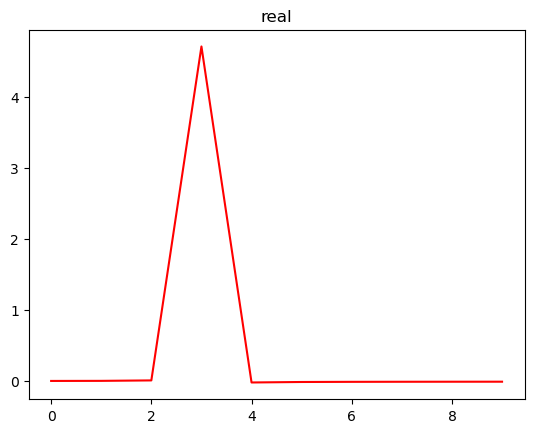

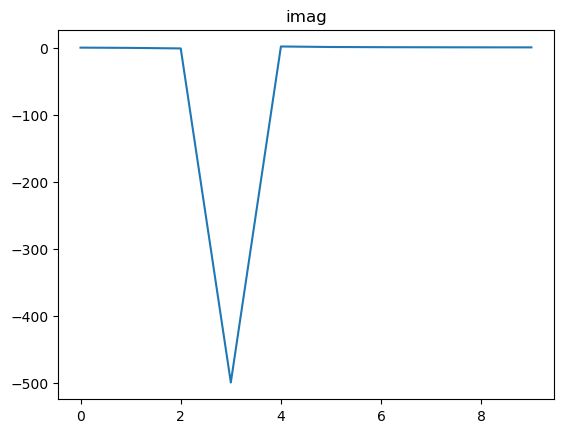

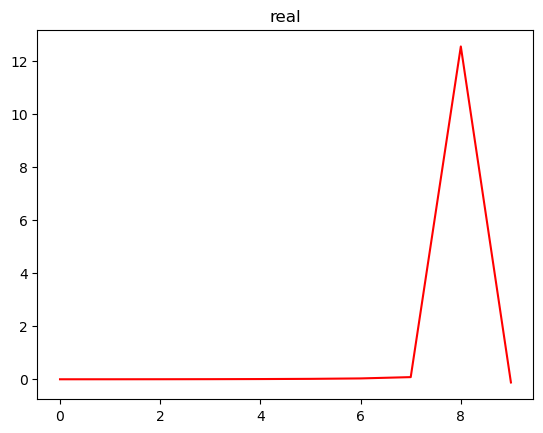

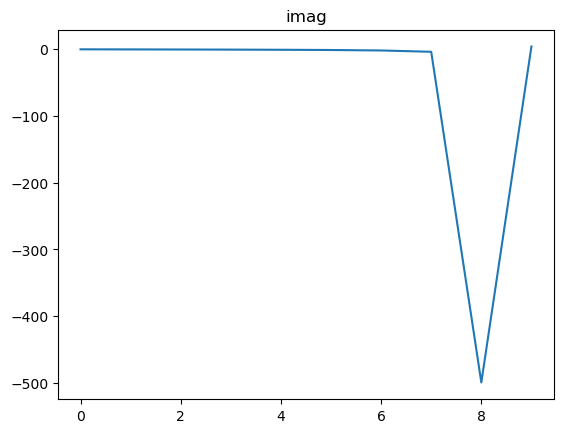

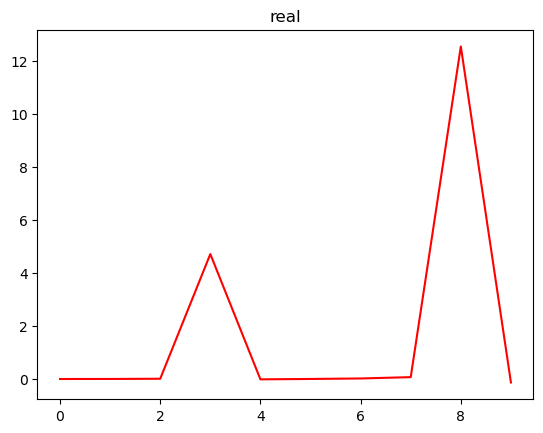

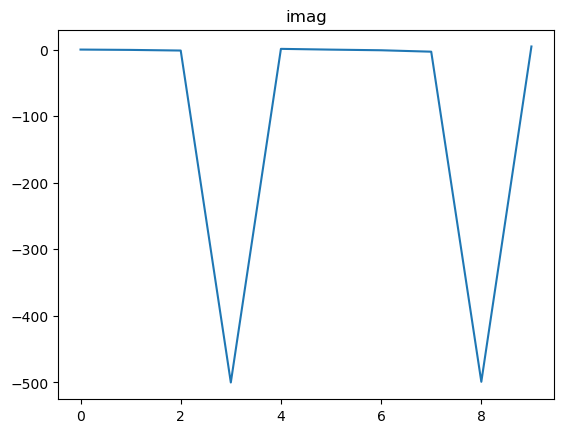

In [114]:
def plot_fourier1d(signal: np.ndarray):
    fourier = fourier1d(signal)
    real = np.real(fourier)
    imag = np.imag(fourier)
    plt.plot(real[:10], color='red')
    plt.title('real')
    plt.show()
    plt.plot(imag[:10])
    plt.title('imag')
    plt.show()

plot_fourier1d(signal_a)
plot_fourier1d(signal_b)
plot_fourier1d(signal_sum)

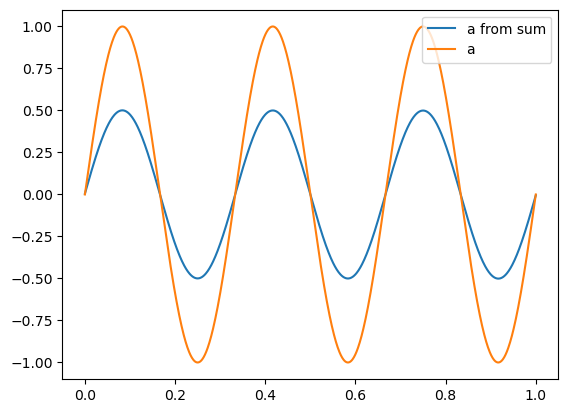

In [131]:
def lpf1d(signal: np.ndarray, max_freq: int) -> np.ndarray:
    fourier = fourier1d(signal)
    fourier[max_freq+1:] = 0
    return inverse_fourier1d(fourier)

signal_a_from_sum = lpf1d(signal_sum, max_freq=5)
plt.plot(x, signal_a_from_sum)
plt.plot(x, signal_a)
plt.legend(['a from sum', 'a'])
plt.show()

/usr/local/anaconda3/envs/playground/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


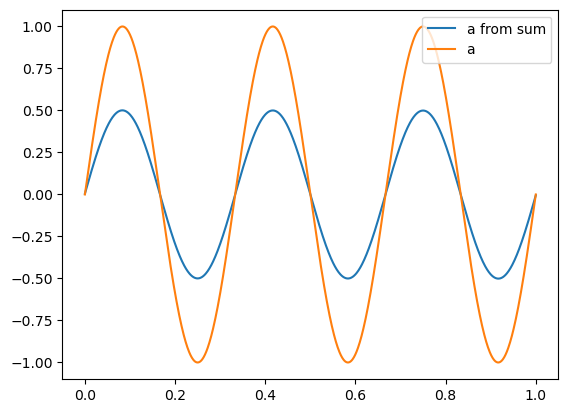

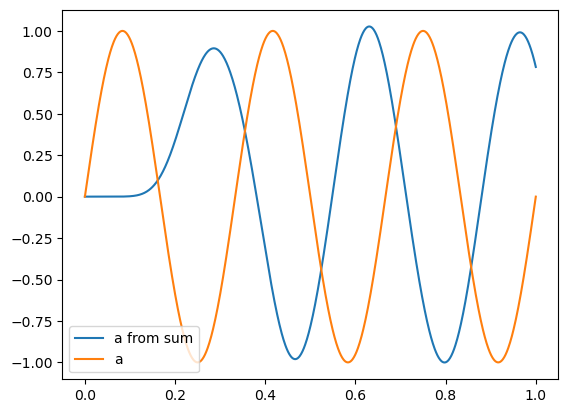

In [137]:
# use existing impl
from scipy import signal as sgn

def existing_lpf1d(signal: np.ndarray, max_freq: int) -> np.ndarray:
    fourier = np.fft.fft(signal)
    fourier[max_freq+1:] = 0
    return np.fft.ifft(fourier)

def better_existing_lpf1d(signal: np.ndarray, max_freq: int) -> np.ndarray:
    sos = sgn.butter(10, max_freq, 'lp', fs=1000, output='sos')
    return sgn.sosfilt(sos, signal)

signal_a_from_sum = existing_lpf1d(signal_sum, max_freq=5)
plt.plot(x, signal_a_from_sum)
plt.plot(x, signal_a)
plt.legend(['a from sum', 'a'])
plt.show()

signal_a_from_sum = better_existing_lpf1d(signal_sum, max_freq=5)
plt.plot(x, signal_a_from_sum)
plt.plot(x, signal_a)
plt.legend(['a from sum', 'a'])
plt.show()

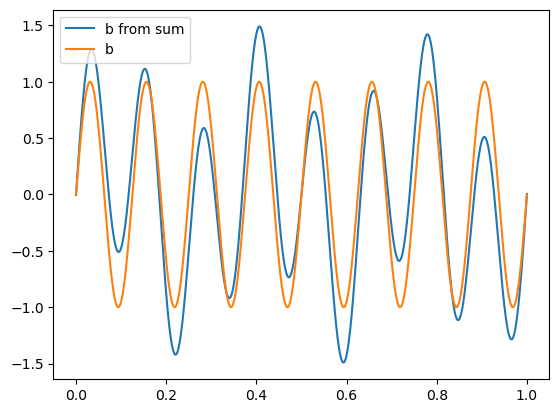

In [138]:
def hpf1d(signal: np.ndarray, min_freq: int) -> np.ndarray:
    fourier = fourier1d(signal)
    fourier[:min_freq] = 0
    return inverse_fourier1d(fourier)

signal_b_from_sum = hpf1d(signal_sum, min_freq=6)
plt.plot(x, signal_b_from_sum)
plt.plot(x, signal_b)
plt.legend(['b from sum', 'b'])
plt.show()

In [153]:
def fourier2d(signal: np.ndarray) -> np.ndarray:
    max_freq_1 = signal.shape[0]
    max_freq_2 = signal.shape[1]
    fourier = np.empty((max_freq_1, max_freq_2), dtype=complex)
    for f1 in range(max_freq_1):
        for f2 in range(max_freq_2):
            fourier_freq = 0
            for i1, s1 in enumerate(signal):
                for i2, s2 in enumerate(s1):
                    x1 = i1 / max_freq_1
                    x2 = i2 / max_freq_2
                    fourier_freq += s2 * np.exp(-2j*np.pi*(f1*x1 + f2*x2))
            fourier[f1, f2] = fourier_freq
    return fourier

def inverse_fourier2d(fourier: np.ndarray) -> np.ndarray:
    signal_len_1 = fourier.shape[0]
    signal_len_2 = fourier.shape[1]
    signal = np.empty((signal_len_1, signal_len_2), dtype=complex)
    for i1 in range(signal_len_1):
        for i2 in range(signal_len_2):
            signal_i = 0
            for f1, fourier_f1 in enumerate(fourier):
                for f2, fourier_f2 in enumerate(fourier_f1):
                    x1 = f1 / signal_len_1
                    x2 = f2 / signal_len_2
                    signal_i += fourier_f2 * np.exp(2j*np.pi*(i1*x1 + i2*x2))
            signal[i1, i2] = signal_i / signal_len_1 / signal_len_2
    return np.real(signal)

test_signal = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
fourier = fourier2d(test_signal)
inverse_fourier = inverse_fourier2d(fourier)
assert np.allclose(test_signal, inverse_fourier)
assert np.allclose(np.fft.fft2(test_signal), fourier)
assert np.allclose(np.fft.ifft2(fourier), inverse_fourier)